In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import copy
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler


np.random.seed(123)

In [1]:
import urllib.request
urllib.request.urlretrieve ("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", "housing.data")

('housing.data', <http.client.HTTPMessage at 0x2a32c4f64c0>)

In [4]:
df = pd.read_csv("housing.data", delim_whitespace=True, header=None)
dataset = df.values
test_split = 0.1
valid_split = 0.1

X = dataset[:,0:13]
Y = dataset[:,13]

v_index = int(X.shape[0]*(1-valid_split-test_split))
t_index = int(X.shape[0]*(1-test_split))

X_test = X[t_index:]
Y_test = Y[t_index:]
X_valid = X[v_index:t_index]
Y_valid = Y[v_index:t_index]
X = X[:v_index]
Y = Y[:v_index]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [5]:
patience=40
early_stopping=EarlyStopping(patience=patience, verbose=1)
checkpointer=ModelCheckpoint(filepath='weights.hdf5', save_best_only=True, verbose=1)

In [6]:
model = Sequential()
model.add(Dense(60, input_dim=X.shape[1]))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

sgd = SGD(learning_rate=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer=sgd)
history=model.fit(X,Y,epochs=10000, 
                  batch_size=16,
                  verbose=2,
                  validation_data=(X_valid, Y_valid),
                  callbacks=[checkpointer, early_stopping])

Epoch 1/10000
26/26 - 2s - loss: 173.8255 - val_loss: 27.1016

Epoch 00001: val_loss improved from inf to 27.10158, saving model to weights.hdf5
Epoch 2/10000
26/26 - 0s - loss: 39.0096 - val_loss: 18.9510

Epoch 00002: val_loss improved from 27.10158 to 18.95097, saving model to weights.hdf5
Epoch 3/10000
26/26 - 0s - loss: 37.1025 - val_loss: 26.2001

Epoch 00003: val_loss did not improve from 18.95097
Epoch 4/10000
26/26 - 0s - loss: 29.9982 - val_loss: 31.5392

Epoch 00004: val_loss did not improve from 18.95097
Epoch 5/10000
26/26 - 0s - loss: 33.7549 - val_loss: 26.9544

Epoch 00005: val_loss did not improve from 18.95097
Epoch 6/10000
26/26 - 0s - loss: 32.4417 - val_loss: 37.1049

Epoch 00006: val_loss did not improve from 18.95097
Epoch 7/10000
26/26 - 0s - loss: 30.6834 - val_loss: 30.0318

Epoch 00007: val_loss did not improve from 18.95097
Epoch 8/10000
26/26 - 0s - loss: 30.9770 - val_loss: 35.9752

Epoch 00008: val_loss did not improve from 18.95097
Epoch 9/10000
26/26 - 

In [7]:
model = load_model('weights.hdf5')

from sklearn.metrics import mean_squared_error
model = load_model('weights.hdf5')
preds = model.predict(X_test)
test_err = mean_squared_error(Y_test,preds)
print("\nTeszt hiba: %f" % (test_err))


Teszt hiba: 10.498566


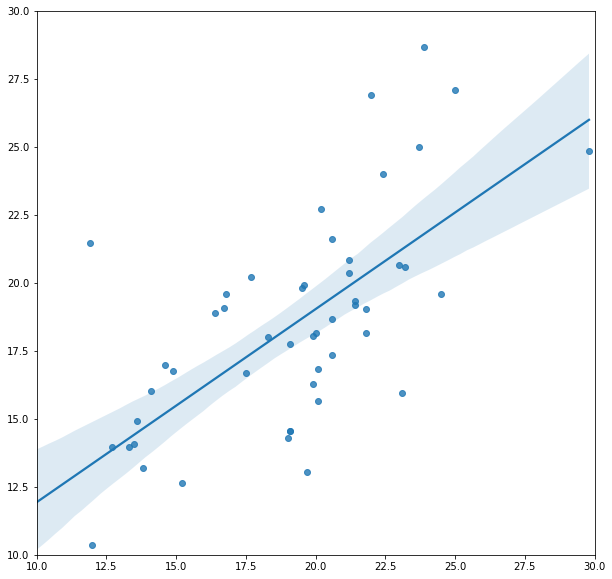

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test, y=preds.reshape(-1)).set(xlim=(10,30),ylim=(10,30));